## Steps

## Importing the liberaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data loading and Processing

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data')

Skipping, found downloaded files in ".\gold-price-data" (use force=True to force download)


In [4]:
data = pd.read_csv('gold-price-data/gld_price_data.csv')

In [5]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
data.shape

(2290, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
data.duplicated().sum()

0

## Data Visualization

In [11]:
correlation = data.corr()

<AxesSubplot:>

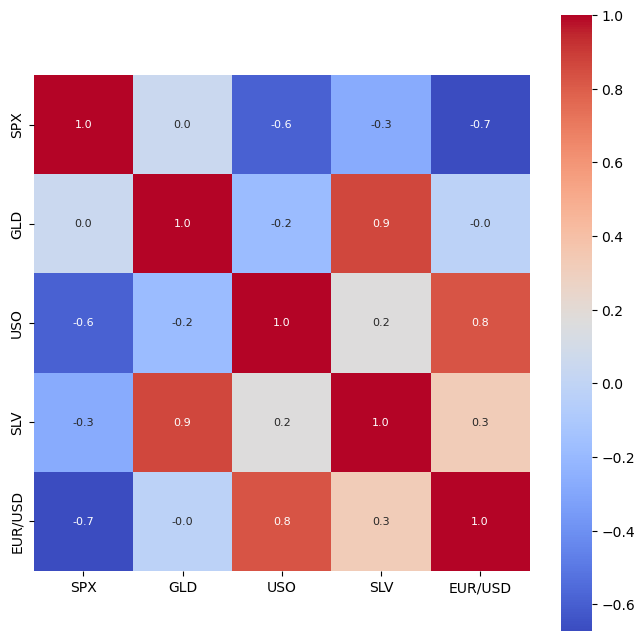

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square= True, fmt ='0.1F',annot=True, annot_kws={'size':8},
           cmap='coolwarm')

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


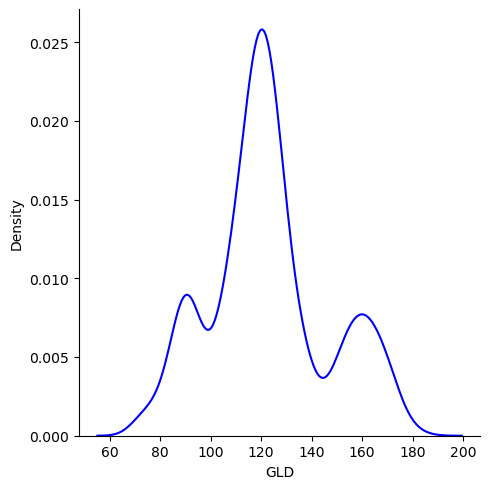

In [14]:
sns.displot(data['GLD'],color='blue',kind='kde')

## Seperating the Features and Target

In [15]:
X = data.drop(['Date','GLD'], axis= 1)
y = data['GLD']

In [16]:
print(X.head(),y.head(),sep='\n\n')

           SPX        USO     SLV   EUR/USD
0  1447.160034  78.470001  15.180  1.471692
1  1447.160034  78.370003  15.285  1.474491
2  1411.630005  77.309998  15.167  1.475492
3  1416.180054  75.500000  15.053  1.468299
4  1390.189941  76.059998  15.590  1.557099

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64


In [17]:
print(X.shape,y.shape)

(2290, 4) (2290,)


## Splitting into Training and Testing Data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the Model

In [19]:
reg  = RandomForestRegressor(n_estimators=100)

In [20]:
reg.fit(X_train, y_train)

RandomForestRegressor()

### Model  Prediction and Evaluation

In [21]:
y_pred = reg.predict(X_test)

In [22]:
print(y_pred)

[122.39609937 130.09870277 127.49099985  96.52739761 118.95260066
 114.36609919 124.93240132 117.76869924 108.04570138  98.06969975
  95.51759931 168.078098   149.49220169 116.35890084 170.55870122
  84.95619995 123.22689869 109.06619677 113.39470047 131.59360326
 124.25499895 113.60840079 115.87990074 108.77999955 108.6293014
 125.84889891 118.03710011 112.46489927 113.20100112 125.70549852
 146.36000143  89.75309985 168.0189     113.81269914 108.364001
 120.02590113 141.22829821 161.27950233 173.56409849 153.15240176
 119.09420114 113.69590062 121.43829929 113.72159915 121.99603807
 107.86580061  88.76059899 114.43269913 129.57640248 118.10530121
 103.83000017 129.63670244 107.09219826 160.67270331 131.7788009
 118.73779977 147.11240001 134.94330161  95.69650117 124.69690135
 115.19979847  86.24100085 104.24559919 114.01290068  84.19679935
 122.20303798 116.45059934 113.67840195 164.87840254  92.53100028
  80.28160093 161.1519008  158.33580146 106.95290044 150.1974008
 109.58299739 1

In [23]:
err = metrics.r2_score(y_test,y_pred)
print(err)

0.9899845367931636


### Result Visualization

In [26]:
y_test = list(y_test)
type(y_test)

list

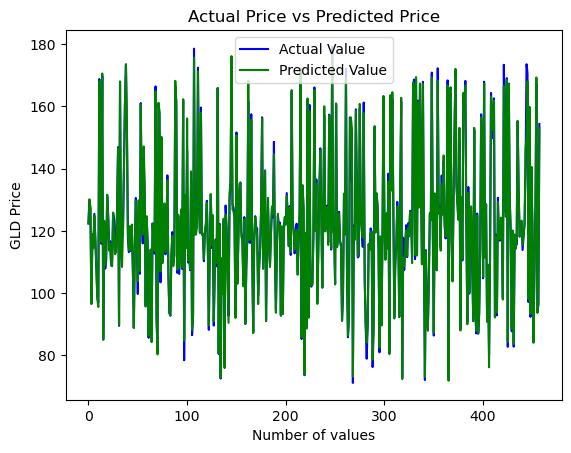

In [32]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.plot(y_pred.mean(),color = 'red')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

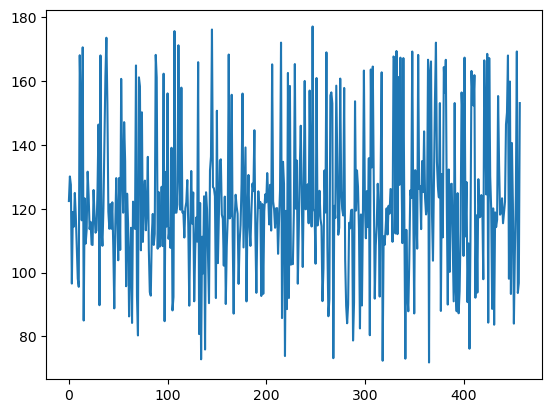

In [38]:
#plt.plot(y_test)
plt.plot(y_pred)
plt.show()

In [31]:
y_pred.mean()

122.05873985606985